# Import Library

In [1]:
# pip install requests beautifulsoup4 lxml
# nltk.download()
import nltk
import requests
from bs4 import BeautifulSoup # For crawling web

# For Data Frame
import pandas as pd

# For text pre-processing 
import re #tokenization
import numpy as np #For Array
import string 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer

# For Machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# For calculating 
from sklearn import metrics
from math import sqrt

# For plotting graph 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix #For ploting confusion matrix

# Creating UI
from tkinter import *
from tkinter import ttk

# For LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Functions for web crawling

In [2]:
#convert the list to data frame
def listToDf(wordList, sentiment):
    df = pd.DataFrame(wordList, columns=['sentence'])
    labels = sentiment
    df['sentiment'] = labels 
    return df

In [3]:
#extract the element from web 
def extractWeb(webText):
    #find the element we want
    table = soup.find('div', attrs = {'class':'entry-content'})
    datas = soup.find_all("ul", class_='')

    povList = []
    # Iterate through all li tags
    for data in datas:
        # Get text from each tag
        if data.text == " ":
            break

        if "\n" in data.text:
            break

        povList.append(data.text)
        
    return povList

In [4]:
#extract the desired words from page
def extractWord(webPage):
    
    #assign the texts to a variable
    webPageText = webPage.text

    #removing the comment in the text
    rangeOfWordsUsed = webPageText.rfind(';') + 3

    #split the texts word by word
    wordList = webPageText[rangeOfWordsUsed:-1].split()
    
    return wordList

# Positive Statements (Chow Weng Yong)

In [5]:
#Get access to the website
url = "https://www.wordscoach.com/blog/examples-of-positive-sentences/"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')

#check if the website is reachable
if resp.status_code == 200:
    povList = extractWeb(soup)
    povDf = listToDf(povList, 'positive')
    print('sentence is Crawled. ')
else:
    print('The Website is Unreachable !')

sentence is Crawled. 


# Negative Statements (Chow Weng Yong)

In [6]:
#Get access to the website
url = "https://www.wordscoach.com/blog/examples-of-negative-sentences/"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')
#check if the website is reachable
if resp.status_code == 200:
    negList = extractWeb(soup)
    negDf = listToDf(negList, 'negative')
    print('sentence is Crawled. ')
else:
    print('The Website is Unreachable !')

sentence is Crawled. 


# Additional dataset (Chow Weng Yong & Ainisha)

In [7]:
#first additional dataSet
url = 'https://raw.githubusercontent.com/AT212121/url/20d1594fbd7e93d1e236140a1aed369dafa31330/Data%201.csv'
data = pd.read_csv(url)

csvData = pd.DataFrame(data)
data.columns = ['sentence', 'sentiment']

#Count number data 
print(csvData['sentiment'].value_counts())

positive    5027
negative    4972
Name: sentiment, dtype: int64


In [8]:
#second additional dataSet
url = 'https://raw.githubusercontent.com/AT212121/url/20d1594fbd7e93d1e236140a1aed369dafa31330/Data%202.csv'
data = pd.read_csv(url)

csvData2 = pd.DataFrame(data)
data.columns = ['sentence', 'sentiment']

#Count number data 
csvData2['sentiment'].value_counts()
# csvData2.head()

negative    5124
positive    4875
Name: sentiment, dtype: int64

In [9]:
#third additional dataSet
url = 'https://raw.githubusercontent.com/AT212121/url/20d1594fbd7e93d1e236140a1aed369dafa31330/Data%203.csv'
data = pd.read_csv(url)

csvData3 = pd.DataFrame(data)
data.columns = ['sentence', 'sentiment']

#Count number data 
csvData3['sentiment'].value_counts()
# csvData3.head()

positive    5112
negative    4887
Name: sentiment, dtype: int64

In [10]:
# url = 'https://raw.githubusercontent.com/AT212121/url/20d1594fbd7e93d1e236140a1aed369dafa31330/Data%204.csv'
# data = pd.read_csv(url)

# csvData4 = pd.DataFrame(data)
# data.columns = ['sentence', 'sentiment']

# #Count number data 
# csvData4['sentiment'].value_counts()
# csvData4.head()

In [11]:
# # Fifth individual words
# url = 'https://raw.githubusercontent.com/AT212121/url/20d1594fbd7e93d1e236140a1aed369dafa31330/Data%205.csv'
# data = pd.read_csv(url)

# csvData5 = pd.DataFrame(data)
# data.columns = ['sentence', 'sentiment']

# #Count number data 
# csvData5['sentiment'].value_counts()
# csvData5.head()

In [12]:
# To retrieve the information from the particular website
# Retrieve the positive sentiment english words
pos_URL = "https://ptrckprry.com/course/ssd/data/positive-words.txt"
pos_page = requests.get(pos_URL)


povWordsList = extractWord(pos_page)

#Stemming the text
povWordsList = listToDf(povWordsList, 'positive')
# print(povWordsList.head())

In [13]:
# To retrieve the information from the particular website
# Retrieve the negative sentiment english words
neg_URL = "https://ptrckprry.com/course/ssd/data/negative-words.txt"
neg_page = requests.get(neg_URL)

negWordsList = extractWord(neg_page)

#Stemming the text
negWordsList = listToDf(negWordsList, 'negative')
# print(negWordsList.head())

# Combination of Data Frame (Chow Weng Yong)

In [14]:
#combine the both positive and negative words
frame = [povDf, negDf, csvData, povWordsList, negWordsList, csvData2, csvData3]
povNneg = pd.concat(frame)

#shuffle the data frame
povNneg = povNneg.sample(frac = 1)
print("The length of the whole dataset", len(povNneg))
# print(povNneg.head(10))

The length of the whole dataset 37061


# Data Preprocessing (Chow Weng Yong)

In [15]:
# the number of each positive and negative label
# povNneg['sentiment'].value_counts()

In [16]:
# Function for removing punctuation
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

# Function for removing numbers
def remove_number(text):
    numberFree = ''.join(i for i in text if not i.isdigit())
    return numberFree

# Function for removing stopwords from tokenized columns 
def remove_stopwords(text):
    # Stop words we using
    stopwords = nltk.corpus.stopwords.words('english')
    new_Stop = 'br'
    stopwords.extend(new_Stop)
    output= [i for i in text if i not in stopwords]
    return output

# Function for lemmatization
def lemmatizerFunction(text):
    #object for Lemmatization
    lemmatizer = WordNetLemmatizer()

    lemm_text = [lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Function for tokenization
def tokenization(text):
    tokens = nltk.word_tokenize(text)
    return tokens

In [17]:
# Storing the sentence without punctuation in another column (clean_sentence)
povNneg['clean_sentence']= povNneg['sentence'].apply(lambda x:remove_punctuation(x))

# Removing numbers from clean_sentence
povNneg['clean_sentence']= povNneg['clean_sentence'].apply(lambda x:remove_number(x))

# Convert all the element in (clean_sentence) to lower case
povNneg['clean_sentence'] = povNneg['clean_sentence'].apply(lambda x: x.lower())

# Storing the tokenized clean_sentence into another column(tokenized)
povNneg['tokenized'] = povNneg['clean_sentence'].apply(lambda x: tokenization(x))

# Removing the stop words from tokenized columns
povNneg['tokenized'] = povNneg['tokenized'].apply(lambda x:remove_stopwords(x))

# Lemmatizing texts
povNneg['tokenized'] = povNneg['tokenized'].apply(lambda x:lemmatizerFunction(x))

In [18]:
povNneg['clean_sentence'] = povNneg['tokenized'].apply(lambda x:" ".join(x))

In [19]:
print(povNneg.head())

                                               sentence sentiment  \
4280                                           tortured  negative   
3113                                            onerous  negative   
906   A clever script from the late SEBASTIAN JAPRIS...  positive   
5861  Richard Dreyfuss is, indeed, in this flick, bu...  negative   
4866  I know it is fashionable now to hate this movi...  positive   

                                         clean_sentence  \
4280                                           tortured   
3113                                            onerous   
906   clever script late sebastian japrisot smart pe...   
5861  richard dreyfus indeed flick rather small part...   
4866  know fashionable hate movie seen hundred spook...   

                                              tokenized  
4280                                         [tortured]  
3113                                          [onerous]  
906   [clever, script, late, sebastian, japrisot, sm... 

In [26]:
wnl = WordNetLemmatizer()
print(wnl.lemmatize("files"))

file


# Long Short Term Memory (Chow Weng Yong)

In [26]:
#change the label value into numeric form then store in a variable
sentiment_label = povNneg.sentiment.factorize()

In [27]:
#conver the column name tokenized to list
listOfpovNneg = povNneg.tokenized.values
# print(listOfpovNneg)

In [28]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(listOfpovNneg)
# print(listOfpovNneg)

In [29]:
# Assigning the sequence to each word (same words will be assigning same value)
encoded_docs = tokenizer.texts_to_sequences(listOfpovNneg)

In [30]:
#Convert the sequence into 2D-array
padded_sequence = pad_sequences(encoded_docs)

In [33]:
print(padded_sequence.shape)

(37059, 947)


In [31]:
# dropout value is to prevent this learning model overfitting
embedding_vector_length = 32
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3988864   
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 32)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 4,005,515
Trainable params: 4,005,515
Non-trainable params: 0
______________________________________________

In [52]:
#validation_split is splitting the data to use 20% for validation
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
927/927 [==============================] - 789s 846ms/step - loss: 0.4824 - accuracy: 0.7716 - val_loss: 0.3750 - val_accuracy: 0.8444
Epoch 2/5
927/927 [==============================] - 780s 841ms/step - loss: 0.3028 - accuracy: 0.8719 - val_loss: 0.3333 - val_accuracy: 0.8593
Epoch 3/5
927/927 [==============================] - 783s 845ms/step - loss: 0.2136 - accuracy: 0.9115 - val_loss: 0.3727 - val_accuracy: 0.8559
Epoch 4/5
927/927 [==============================] - 719s 775ms/step - loss: 0.1528 - accuracy: 0.9411 - val_loss: 0.4301 - val_accuracy: 0.8484
Epoch 5/5
927/927 [==============================] - 777s 838ms/step - loss: 0.1101 - accuracy: 0.9608 - val_loss: 0.4801 - val_accuracy: 0.8381


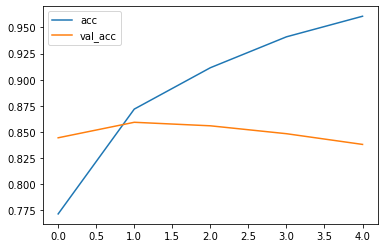

In [53]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

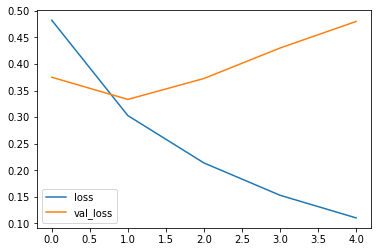

In [54]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [69]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])
test_sentence1 = "i like playing basketball"
predict_sentiment(test_sentence1)
test_sentence2 = "i hate playing basketball"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 353ms/step
Predicted label:  negative
1/1 [==============================] - 0s 28ms/step
Predicted label:  negative


# Splitting the data and vectorizing the data

In [22]:
# Inputs to be fid into the model
X = povNneg.clean_sentence 

# Output of the model
povNneg['label'] = povNneg['sentiment'].apply(lambda x: 1 if x=='positive' else 0)
y = povNneg.label

In [23]:
#splitting the data to training set(80%) & testing set(20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
tfidf = TfidfVectorizer(stop_words= 'english')

# generate the learning model from X_train into tfidf model and assigning value to them
X_train_tf = tfidf.fit_transform(X_train)

# transforming the test data into the form of train data
X_test_tf = tfidf.transform(X_test) 

# Logistic regression Model (Ainisha)

In [45]:
# logistic regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train_tf, y_train)

# Start training Logistic regression model
y_pred = lr.predict(X_test_tf)
print('Accuracy Score: ' , round(metrics.accuracy_score(y_test,y_pred)*100, 4),'%',sep='')

Accuracy Score: 85.3211%


<AxesSubplot:>

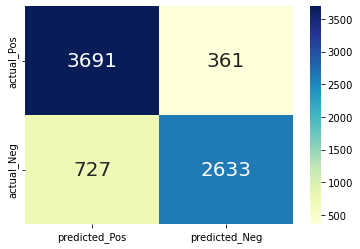

In [46]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_Pos', 'predicted_Neg'], yticklabels=['actual_Pos', 'actual_Neg'], 
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

# K-Nearest Neighbors（Chow Weng Yong)

In [47]:
# Find the best n(neighbors value)
# error_rate = []

# for i in range(85, 95):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(X_train_cv, y_train)
#     pred = knn.predict(X_test_cv)
#     error_rate.append(np.mean(pred != y_test))

# plt.figure(figsize=(15,10))
# plt.plot(range(85, 95),error_rate, marker='o', markersize=9)

In [48]:
# Alternative way to find the best n(neighbors value)
# Algorithm used(sqrt(Total number of training_data))
bestNValue = round(sqrt(X_train_tf.shape[0]))

In [49]:
#Accuracy using KNN Model
KNN = KNeighborsClassifier(n_neighbors = bestNValue)
KNN.fit(X_train_tf, y_train)
y_pred = KNN.predict(X_test_tf)
print('\nK Nearest Neighbors value :', bestNValue)
print('Accuracy Score: ', round(metrics.accuracy_score(y_test,y_pred)*100, 4),'%',sep='')


K Nearest Neighbors value : 172
Accuracy Score: 72.558%


<AxesSubplot:>

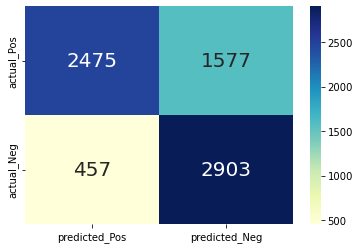

In [50]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_Pos', 'predicted_Neg'], yticklabels=['actual_Pos', 'actual_Neg'], 
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

# Support Vector Machine (Ainisha Ting)

In [51]:
#Model for Support Vector Machine
SVM = LinearSVC()
SVM.fit(X_train_tf, y_train)
y_pred = SVM.predict(X_test_tf)
print('\nSupport Vector Machine')
print('Accuracy Score: ',round(metrics.accuracy_score(y_test,y_pred)*100, 4),'%',sep='')


Support Vector Machine
Accuracy Score: 85.0513%


<AxesSubplot:>

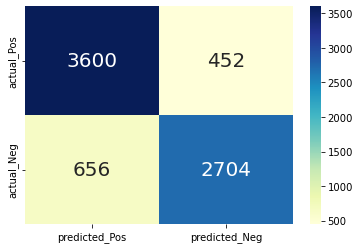

In [52]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_Pos', 'predicted_Neg'], yticklabels=['actual_Pos', 'actual_Neg'], 
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

# Naive Bayes Classification （Ainisha Ting)

In [53]:
#Model For Naive Bayes
NB = MultinomialNB()
NB.fit(X_train_tf, y_train)
y_pred = NB.predict(X_test_tf)
print('Naive Bayes')
print('Accuracy Score: ',round(metrics.accuracy_score(y_test,y_pred)*100, 4),'%',sep='')

Naive Bayes
Accuracy Score: 82.987%


<AxesSubplot:>

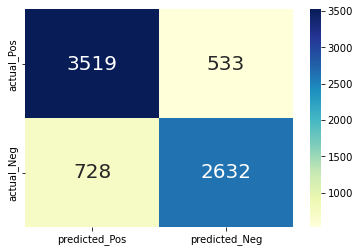

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['predicted_Pos', 'predicted_Neg'], yticklabels=['actual_Pos', 'actual_Neg'], 
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu")

# Accepting User Input （Chow Weng Yong & Ainisha)

In [20]:
bestKNNValue = round(sqrt(len(X)))

In [25]:
userTestingVec = TfidfVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 5)
userTestingVec.fit(X)
X_tested_data = userTestingVec.transform(X)

# Define a model (Logistic Regression)
Lr_model = LogisticRegression()
Lr_model.fit(X_tested_data, y)

# Define a model (K-Nearest Neighbors)
Knn_model = KNeighborsClassifier(n_neighbors = bestKNNValue)
Knn_model.fit(X_tested_data, y)

# Define a model (Support Vector Machine)
Svm_model = LinearSVC()
Svm_model.fit(X_tested_data, y)

# Define a model (Naive Bayes Classification)
Nb_model = MultinomialNB()
Nb_model.fit(X_tested_data, y)

MultinomialNB()

In [26]:
#user input
text = input("What is your thought : ")
text = remove_punctuation(text)
text = remove_number(text)
text = text.lower()
text = remove_number(text)

#test the processed data
test = []
test.append(text)
test_tfidf = userTestingVec.transform(test)
predLabelLr = Lr_model.predict(test_tfidf)
predLabelKnn = Knn_model.predict(test_tfidf)
predLabelSvm = Svm_model.predict(test_tfidf)
predLabelNb = Nb_model.predict(test_tfidf)
tags = ['Negative','Positive']
# Display Output
print('You probably having a ',tags[predLabelLr[0]], 'thoughts.')
print('You probably having a ',tags[predLabelKnn[0]], 'thoughts.')
print('You probably having a ',tags[predLabelSvm[0]], 'thoughts.')
print('You probably having a ',tags[predLabelNb[0]], 'thoughts.')

What is your thought : i love basketball
You probably having a  Positive thoughts.
You probably having a  Positive thoughts.
You probably having a  Positive thoughts.
You probably having a  Negative thoughts.


In [63]:
def display_text():
    # Retrieve the input from text box
    global newInput
    string = newInput.get()

    # Preprocess the input
    text = remove_punctuation(string)
    text = remove_number(text)
    text = text.lower()
    text = tokenization(text)
    text = remove_stopwords(text)
    text = lemmatizerFunction(text)
    text = " ".join(text)
    
    # Test the processed data
    test = []
    test.append(text)
    test_tfidf = userTestingVec.transform(test)
    predLabel = Lr_model.predict(test_tfidf)
    string = "You probably having a " + tags[predLabel[0]] + " thoughts."
    output.configure(text = string)

# Create an instance of Tkinter frame
win = Tk()

# Set the geometry of Tkinter frame
win.geometry("750x400")
win.title("Sentiment analysis")
Label(win, text="Sentiment Analysis", font=('Helvetica 16 bold')).pack(pady=5)
Label(win, text="What is your thoughts ? ", font=('Helvetica 12')).pack(pady=10)
newInput = Entry(win, width = 35,font=("Times 14"))
newInput.pack(pady=10)

# Create a button in the main Window to open the popup
ttk.Button(win, text= "Test", command = display_text).pack()

# Output for result
output = Label(win, text="", font=("Courier 14 bold"))
output.pack(pady=20)

win.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "F:\Anaconda\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\yangz\AppData\Local\Temp\ipykernel_14628\1763564469.py", line 4, in display_text
    string = newInput.get()
TypeError: get() missing 1 required positional argument: 'index1'


In [ ]:
getsizeof